In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Ładowanie i podział zbioru danych

In [2]:
data = pd.read_csv("./data/bank-full.csv")
data.shape

(45211, 17)

In [3]:
build, val = train_test_split(data, test_size=0.3,random_state=42)
train, test = train_test_split(build, test_size=0.3, random_state=42)

In [4]:
df = train.iloc[:, 8:16].copy()
df.shape

(22152, 8)

# Eksploracyjna analiza danych

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 28440 to 36613
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contact   22152 non-null  object
 1   day       22152 non-null  int64 
 2   month     22152 non-null  object
 3   duration  22152 non-null  int64 
 4   campaign  22152 non-null  int64 
 5   pdays     22152 non-null  int64 
 6   previous  22152 non-null  int64 
 7   poutcome  22152 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.5+ MB


Brak braków danych, kolumny zarówno numeryczne jak i kategoryczne

In [6]:
df.describe()

,day,duration,campaign,pdays,previous
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,15.863714,257.111547,2.767606,40.539410,0.586087
std,8.311830,256.093527,3.123506,101.040739,2.600391
min,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,21.000000,318.000000,3.000000,-1.000000,0.000000
max,31.000000,4918.000000,58.000000,871.000000,275.000000


## Contact

Rodzaj komunikacji z klientem

In [7]:
df.contact.value_counts()

cellular     14413
unknown       6334
telephone     1405
Name: contact, dtype: int64

## Day

Dzień miesiąca, w którym nastąpił ostatni kontakt z klientem

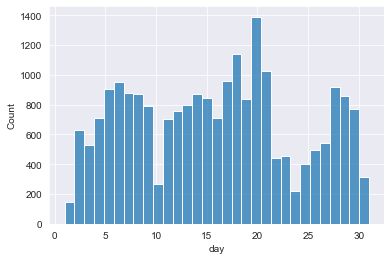

In [8]:
sns.histplot(df.day, bins=31)
plt.show()

Obserwujemy zmniejszoną aktywność 1., 10. i 24. dnia każdego miesiąca i intrygujący peak 20. dnia miesiąca.

## Month

Miesiąc, w którym nastąpił ostatni kontakt z klientem

In [9]:
df.month.value_counts()

may    6678
jul    3382
aug    3018
jun    2635
nov    1961
apr    1457
feb    1324
jan     695
oct     370
sep     284
mar     236
dec     112
Name: month, dtype: int64

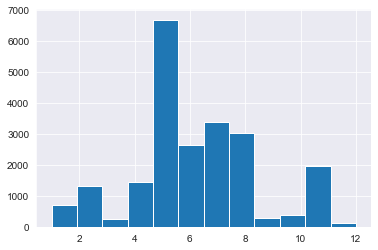

In [10]:
df.replace({"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}).month.hist(bins=12)
plt.show()

Widzimy nasilenie w miesiącach wiosennych i letnich - duży peak w maju, rzadziej jesienią i zimą (z wyjątkiem października)

## Duration

Czas w sekundach ostatniego kontaktu z klientem

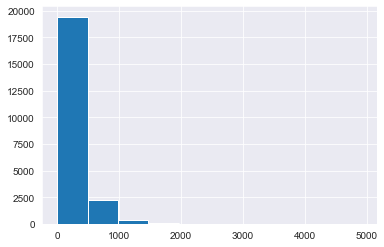

In [11]:
df.duration.hist()
plt.show()

Być może są obecne wartości odstające

In [12]:
df.duration.sort_values(ascending=False)

24148    4918
9947     3881
44602    3785
30747    3102
6451     3094
         ... 
2599        3
287         2
31740       1
22937       0
36425       0
Name: duration, Length: 22152, dtype: int64

Potraktujemy czas trwania połączenia powyżej 2000 sekund jako outlier, żeby nie psuło nam to za bardzo scalingu

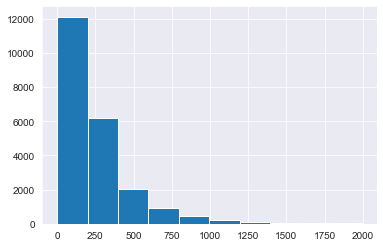

In [13]:
df[df.duration<2000].duration.hist()
plt.show()

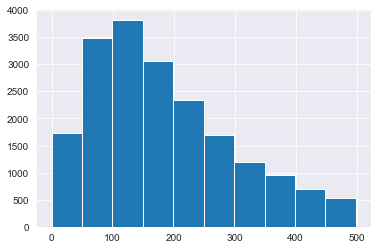

In [14]:
df[df.duration<500].duration.hist()
plt.show()

## Campaign

Liczba kontaktów z klientem w aktualnej kampanii (włączając ostatni kontakt)

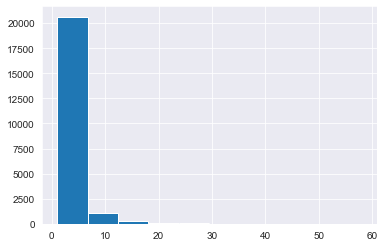

In [15]:
df.campaign.hist()
plt.show()

In [16]:
df.campaign.sort_values(ascending=False)

11914    58
18713    50
10697    46
18744    44
18660    43
         ..
41076     1
7604      1
27081     1
4386      1
36613     1
Name: campaign, Length: 22152, dtype: int64

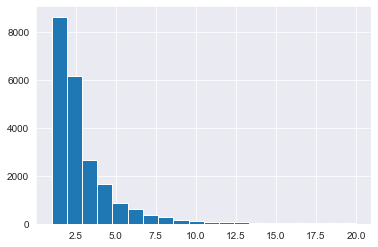

In [17]:
df[df.campaign<=20].campaign.hist(bins=20)
plt.show()

## Pdays

Liczba dni, które upłynęły od ostatniego kontaktu z klientem z poprzedniej kampanii (-1 oznacza brak kontaktu w poprzedniej kampanii)

In [18]:
df[df.pdays == -1].size/df.size

0.8158631274828458

Dla większośći klientów jest to pierwsza kampania, w której uczestniczą

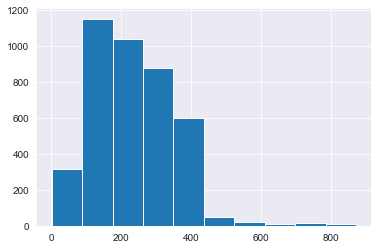

In [19]:
df[df.pdays != -1].pdays.hist()
plt.show()

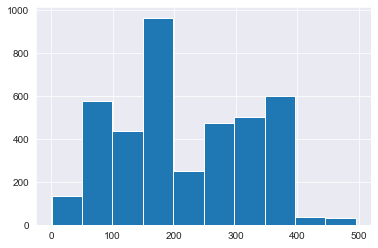

In [20]:
df[(df.pdays != -1) & (df.pdays < 500)].pdays.hist()
plt.show()

## Previous

Liczba kontaktów z klientem przed aktualną kampanią

In [21]:
df[df.previous == 0].size/df.size

0.8158631274828458

Analogicznie

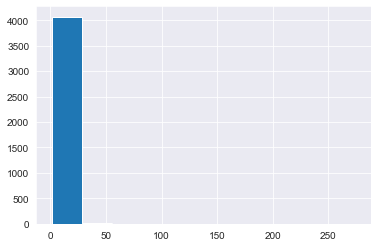

In [22]:
df[df.previous != 0].previous.hist()
plt.show()

Występują pewne outliery

In [23]:
df.previous.sort_values(ascending=False)

29182    275
44822     41
42611     40
37567     38
42422     37
        ... 
42237      0
6928       0
12723      0
23308      0
36613      0
Name: previous, Length: 22152, dtype: int64

No te 275 dość sporo

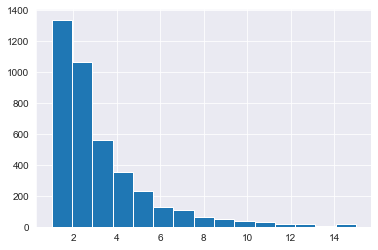

In [24]:
df[(df.previous != 0) & (df.previous <= 15)].previous.hist(bins=15)
plt.show()

## Poutcome

Rezultat poprzedniej kampanii

In [25]:
df.poutcome.value_counts()

unknown    18076
failure     2404
other        924
success      748
Name: poutcome, dtype: int64

Sporo nieznanych wartości, spróbujemy z kodowaniem one hot encoding ale być może usuniemy tą zmienną

# Preprocessing